In [24]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
df = pd.read_csv("nhanes_2015_2016.csv")

In [25]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [26]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [27]:
#easy was to this
keep = ['BPXSY1', 'BPXDI1', 'BPXSY2','BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST']

In [28]:
#python was to do this
keep = [column for column in df.columns if 'BM' in column]

In [29]:
df[keep].head(2)

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9


In [30]:
df.loc[:,keep].head(3)

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5


In [31]:
#also other way to do it using bool
index_bool = np.isin(df.columns,keep)

In [32]:
df.iloc[:,index_bool].head(3)

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5


[] Columns indexing with labels
.loc label indexing with bool arrays
.iloc integer positon or bool arrays

In [33]:
#wasit larger than median
waist_median = pd.Series.median(df['BMXWAIST'])
waist_median

98.3

In [35]:
condition1 = df['BMXWAIST'] > waist_median
condition2 = df['BMXLEG'] < 32
df[condition1 & condition2].head(3)


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
15,83757,1.0,NaN,1.0,2,2,57,2,1.0,1.0,4.0,5,11709.11,1,120,0.77,134.0,68.0,146.0,62.0,80.5,150.8,35.4,31.6,32.7,33.7,113.5,2.0
27,83785,2.0,1.0,1.0,1,2,60,2,1.0,5.0,3.0,4,10495.87,1,128,5.00,142.0,74.0,136.0,74.0,75.6,145.2,35.9,31.0,33.1,36.0,108.0,2.0
39,83812,1.0,NaN,2.0,2,2,68,1,1.0,3.0,1.0,3,10255.97,1,124,5.00,124.0,56.0,114.0,66.0,63.7,147.9,29.1,26.0,34.0,31.5,110.0,2.0


In [36]:
df.loc[condition1 & condition2, :].head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
15,83757,1.0,NaN,1.0,2,2,57,2,1.0,1.0,4.0,5,11709.11,1,120,0.77,134.0,68.0,146.0,62.0,80.5,150.8,35.4,31.6,32.7,33.7,113.5,2.0
27,83785,2.0,1.0,1.0,1,2,60,2,1.0,5.0,3.0,4,10495.87,1,128,5.00,142.0,74.0,136.0,74.0,75.6,145.2,35.9,31.0,33.1,36.0,108.0,2.0
39,83812,1.0,NaN,2.0,2,2,68,1,1.0,3.0,1.0,3,10255.97,1,124,5.00,124.0,56.0,114.0,66.0,63.7,147.9,29.1,26.0,34.0,31.5,110.0,2.0


In [41]:
df_small = df.head(5)
df_small

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [44]:
df_small.index = ['a','b','c','d','e']
df_small.iloc[[1,2],:]

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
b,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
c,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


In [46]:
df_small.loc[:,'BMXBMI'].values

array([27.8, 30.8, 28.8, 42.4, 20.3])

In [48]:
df_small.iloc[:,22]

a    27.8
b    30.8
c    28.8
d    42.4
e    20.3
Name: BMXBMI, dtype: float64

In [49]:
df_small['BMXBMI']

a    27.8
b    30.8
c    28.8
d    42.4
e    20.3
Name: BMXBMI, dtype: float64

In [52]:
df.iloc[0:5,22] = range(5)
df_small.BMXBMI

a    0
b    1
c    2
d    3
e    4
Name: BMXBMI, dtype: int32

# Multivariate Distributions in Python

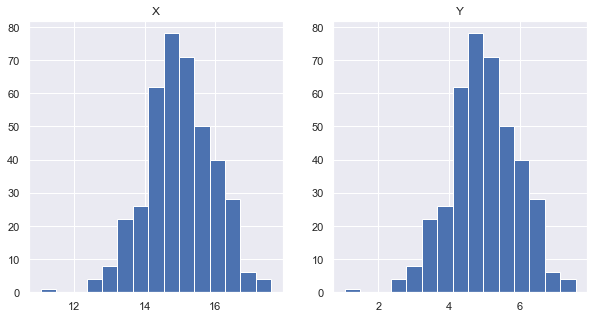

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

r=1

mean = [15,5]
cov = [[1,r],[r,1]]
x,y = x,y = np.random.multivariate_normal(mean,cov,400).T

plt.figure(figsize=(10,5))

# plot histogram

plt.subplot(1,2,1)
plt.hist(x=x,bins=15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x=y,bins=15)
plt.title("Y")

plt.show()

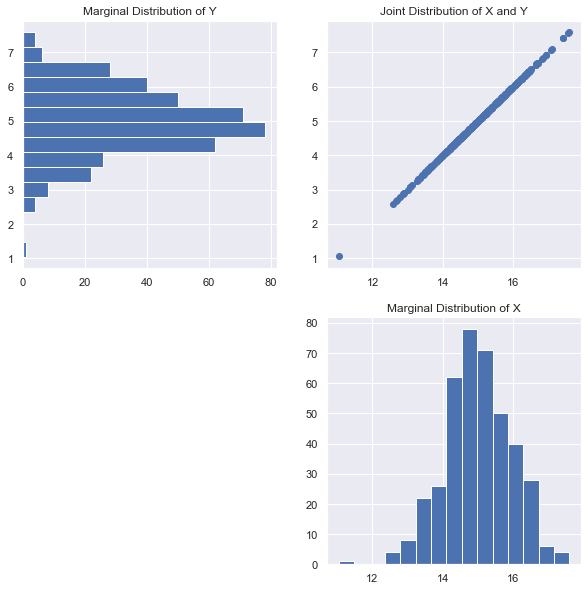

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = x, bins = 15)
plt.title("Marginal Distribution of X")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = y, orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of Y")

# Show the plots
plt.show()

# Unit Testing

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns',100)

df = pd.read_csv("nhanes_2015_2016.csv")
df.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
